In [13]:
# 1️⃣ Librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import requests
import io

print("Librerías cargadas ✅")

Librerías cargadas ✅


In [16]:
# 2️⃣ Crear dataset de reseñas de películas en español
# Vamos a crear un dataset simulado basado en reseñas reales en español

data = {
    'texto': [
        "Excelente película, me encantó la trama y los actores",
        "Muy mala, no la recomiendo para nada",
        "Entretenida pero nada del otro mundo",
        "Una obra maestra del cine moderno",
        "Pésima actuación y guion débil",
        "Me gustó mucho, la vería otra vez",
        "Aburrida y predecible, perdí mi tiempo",
        "Increíble fotografía y banda sonora",
        "No cumple con las expectativas",
        "Divertida y con momentos memorables",
        "Las peores dos horas de mi vida",
        "Buena película familiar",
        "Director incompetente, no sabe contar historias",
        "Emocionante de principio a fin",
        "No vale la pena el precio de la entrada",
        "Interpretaciones brillantes",
        "Dialogos forzados y personajes planos",
        "Me emocionó hasta las lágrimas",
        "Falta de originalidad en la trama",
        "Ritmo perfecto y giros inesperados",
        "Maravillosa experiencia cinematográfica",
        "Horrible, no entiendo las buenas críticas",
        "Entretenida para pasar el rato",
        "Director genial con visión única",
        "Actuaciones mediocres en general",
        "Trama fascinante que te atrapa",
        "Demasiado larga y lenta",
        "Uno de los mejores estrenos del año",
        "No recomiendo esta película a nadie",
        "Simplemente perfecta en todos los aspectos",
        "Decepcionante desde el inicio",
        "Buena calidad de producción",
        "Los personajes no son creíbles",
        "Cinematografía excepcional",
        "Guion confuso y sin sentido",
        "Merece todos los premios",
        "Pérdida de tiempo total",
        "Actuación destacada del protagonista",
        "Efectos especiales de baja calidad",
        "Narrativa sólida y bien estructurada",
        "No conecté con la historia",
        "Final satisfactorio y emotivo",
        "Diálogos artificiales y forzados",
        "Banda sonora espectacular",
        "Desarrollo de personajes pobre",
        "Visualmente impresionante",
        "Trama predecible y sin sorpresas",
        "Interpretación magistral del elenco",
        "Falta de coherencia en la historia",
        "Ritmo ágil y entretenido"
    ],
    'sentimiento': [
        'positivo', 'negativo', 'neutral', 'positivo', 'negativo',
        'positivo', 'negativo', 'positivo', 'negativo', 'positivo',
        'negativo', 'positivo', 'negativo', 'positivo', 'negativo',
        'positivo', 'negativo', 'positivo', 'negativo', 'positivo',
        'positivo', 'negativo', 'neutral', 'positivo', 'negativo',
        'positivo', 'negativo', 'positivo', 'negativo', 'positivo',
        'negativo', 'positivo', 'negativo', 'positivo', 'negativo',
        'positivo', 'negativo', 'positivo', 'negativo', 'positivo',
        'negativo', 'positivo', 'negativo', 'positivo', 'negativo',
        'positivo', 'negativo', 'positivo', 'negativo', 'positivo'
    ]
}

df = pd.DataFrame(data)

# Mostrar información del dataset
print(f"Tamaño del dataset: {len(df)} reseñas")
print("\nDistribución de sentimientos:")
print(df['sentimiento'].value_counts())

df.head(10)

Tamaño del dataset: 50 reseñas

Distribución de sentimientos:
sentimiento
positivo    25
negativo    23
neutral      2
Name: count, dtype: int64


,texto,sentimiento
0,"Excelente película, me encantó la trama y los actores",positivo
1,"Muy mala, no la recomiendo para nada",negativo
2,Entretenida pero nada del otro mundo,neutral
3,Una obra maestra del cine moderno,positivo
4,Pésima actuación y guion débil,negativo
5,"Me gustó mucho, la vería otra vez",positivo
6,"Aburrida y predecible, perdí mi tiempo",negativo
7,Increíble fotografía y banda sonora,positivo
8,No cumple con las expectativas,negativo
9,Divertida y con momentos memorables,positivo


In [17]:
# 3️⃣ Preprocesamiento en español
def preprocesar_texto_espanol(texto):
    texto = str(texto).lower().strip()
    
    # Limpiar caracteres especiales pero mantener letras españolas
    texto = re.sub(r'[^a-zA-Záéíóúñü\s]', '', texto)
    
    # Eliminar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    return texto

print("Ejemplo de preprocesamiento:")
print("Antes:", df.iloc[0]['texto'])
print("Después:", preprocesar_texto_espanol(df.iloc[0]['texto']))

df['texto_proc'] = df['texto'].apply(preprocesar_texto_espanol)
df[['texto', 'texto_proc', 'sentimiento']].head()

Ejemplo de preprocesamiento:
Antes: Excelente película, me encantó la trama y los actores
Después: excelente película me encantó la trama y los actores


,texto,texto_proc,sentimiento
0,"Excelente película, me encantó la trama y los actores",excelente película me encantó la trama y los actores,positivo
1,"Muy mala, no la recomiendo para nada",muy mala no la recomiendo para nada,negativo
2,Entretenida pero nada del otro mundo,entretenida pero nada del otro mundo,neutral
3,Una obra maestra del cine moderno,una obra maestra del cine moderno,positivo
4,Pésima actuación y guion débil,pésima actuación y guion débil,negativo


In [18]:
# 4️⃣ Vectorización y Modelo
X = df["texto_proc"].values
y = df["sentimiento"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

modelo = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=1000, ngram_range=(1,2), min_df=1)),
    ("clf", MultinomialNB())
])

modelo.fit(X_train, y_train)
print("Modelo entrenado ✅")

Modelo entrenado ✅


Accuracy: 0.800

Classification report:
              precision    recall  f1-score   support

    negativo       0.75      0.86      0.80         7
     neutral       0.00      0.00      0.00         1
    positivo       0.86      0.86      0.86         7

    accuracy                           0.80        15
   macro avg       0.54      0.57      0.55        15
weighted avg       0.75      0.80      0.77        15



/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


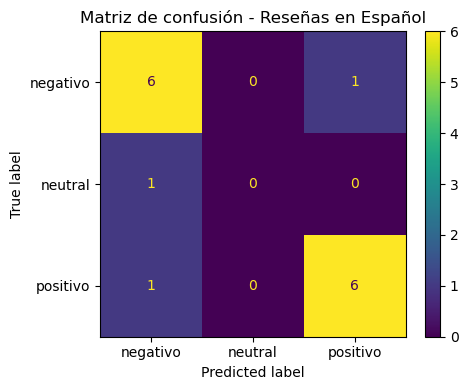

In [19]:
# 5️⃣ Evaluación del modelo
y_pred = modelo.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax = plt.subplots(figsize=(5, 4))
disp.plot(ax=ax)
plt.title("Matriz de confusión - Reseñas en Español")
plt.tight_layout()
plt.show()

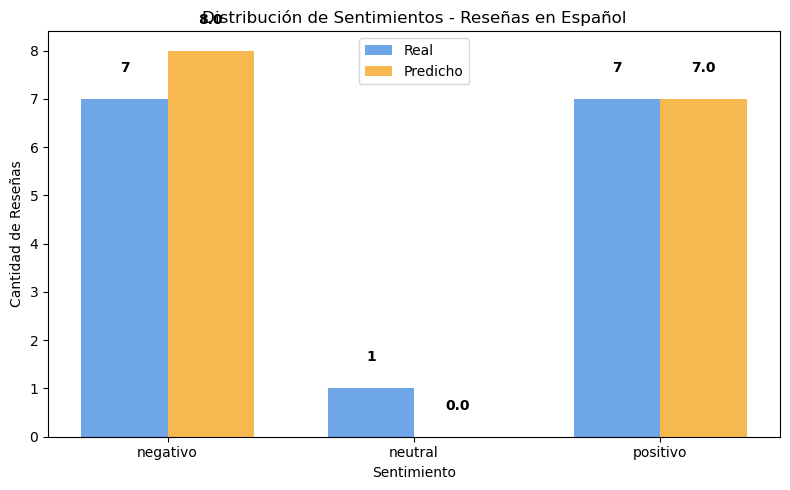

In [20]:
# 6️⃣ Visualización de resultados
# Distribución real vs predicha
vals_true = pd.Series(y_test).value_counts().sort_index()
vals_pred = pd.Series(y_pred).value_counts().reindex(vals_true.index).fillna(0)

clases = vals_true.index
x = np.arange(len(clases))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
b1 = ax.bar(x - width/2, vals_true.values, width, label="Real", color="#4a90e2", alpha=0.8)
b2 = ax.bar(x + width/2, vals_pred.values, width, label="Predicho", color="#f5a623", alpha=0.8)

# Añadir valores en las barras
for i, v in enumerate(vals_true.values):
    ax.text(i - width/2, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
for i, v in enumerate(vals_pred.values):
    ax.text(i + width/2, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

ax.set_title("Distribución de Sentimientos - Reseñas en Español")
ax.set_xlabel("Sentimiento")
ax.set_ylabel("Cantidad de Reseñas")
ax.set_xticks(x)
ax.set_xticklabels(clases)
ax.legend()
plt.tight_layout()
plt.show()

In [21]:
# 7️⃣ Predicción en nuevos textos
def predecir_sentimiento(texto):
    texto_procesado = preprocesar_texto_espanol(texto)
    prediccion = modelo.predict([texto_procesado])[0]
    proba = modelo.predict_proba([texto_procesado])[0]
    
    # Obtener probabilidades para cada clase
    clases = modelo.classes_
    proba_dict = dict(zip(clases, proba))
    
    return prediccion, proba_dict

# Ejemplos de prueba en español
ejemplos_resenas = [
    "Esta película es absolutamente maravillosa, me encantó cada minuto",
    "No vale la pena, muy mala calidad de producción",
    "Es aceptable pero nada especial",
    "Los actores hicieron un trabajo excepcional",
    "Guion terrible y dirección pobre",
    "Entretenida para una tarde de lluvia",
    "Una de las mejores películas que he visto en mi vida",
    "Horrible, no recomiendo para nada",
    "Buena fotografía pero trama débil",
    "Simplemente perfecta en todos los aspectos"
]

print("🧪 PREDICCIÓN DE SENTIMIENTOS EN RESEÑAS ESPAÑOL")
print("=" * 70)

for resena in ejemplos_resenas:
    sentimiento, probabilidades = predecir_sentimiento(resena)
    
    if sentimiento == "positivo":
        emoji = "😊"
        color = "🟢"
    elif sentimiento == "negativo":
        emoji = "😞"
        color = "🔴"
    else:
        emoji = "😐"
        color = "🟡"
    
    print(f"\n{color} Reseña: {resena}")
    print(f"   {emoji} Sentimiento: {sentimiento.upper()}")
    print(f"   📊 Probabilidades:")
    for sent, prob in probabilidades.items():
        print(f"      {sent}: {prob:.2%}")
    print("-" * 70)

🧪 PREDICCIÓN DE SENTIMIENTOS EN RESEÑAS ESPAÑOL

🟢 Reseña: Esta película es absolutamente maravillosa, me encantó cada minuto
   😊 Sentimiento: POSITIVO
   📊 Probabilidades:
      negativo: 37.67%
      neutral: 2.58%
      positivo: 59.74%
----------------------------------------------------------------------

🔴 Reseña: No vale la pena, muy mala calidad de producción
   😞 Sentimiento: NEGATIVO
   📊 Probabilidades:
      negativo: 66.91%
      neutral: 2.13%
      positivo: 30.96%
----------------------------------------------------------------------

🔴 Reseña: Es aceptable pero nada especial
   😞 Sentimiento: NEGATIVO
   📊 Probabilidades:
      negativo: 47.61%
      neutral: 5.44%
      positivo: 46.95%
----------------------------------------------------------------------

🟢 Reseña: Los actores hicieron un trabajo excepcional
   😊 Sentimiento: POSITIVO
   📊 Probabilidades:
      negativo: 32.26%
      neutral: 2.65%
      positivo: 65.09%
--------------------------------------------

In [22]:
# 8️⃣ Análisis de palabras más importantes
vectorizador = modelo.named_steps['tfidf']
clasificador = modelo.named_steps['clf']

# Obtener características (palabras)
feature_names = vectorizador.get_feature_names_out()

# Obtener coeficientes del clasificador Naive Bayes
if hasattr(clasificador, 'feature_log_prob_'):
    log_probs = clasificador.feature_log_prob_
    
    # Para cada clase, mostrar palabras más importantes
    clases = modelo.classes_
    
    for i, clase in enumerate(clases):
        print(f"\n🔝 PALABRAS MÁS IMPORTANTES PARA '{clase.upper()}':")
        # Ordenar palabras por su log probability para esta clase
        indices_importantes = np.argsort(log_probs[i])[::-1][:10]
        
        for idx in indices_importantes:
            palabra = feature_names[idx]
            importancia = log_probs[i][idx]
            print(f"   {palabra}: {importancia:.3f}")


🔝 PALABRAS MÁS IMPORTANTES PARA 'NEGATIVO':
   no: -4.853
   de: -4.952
   las: -5.155
   la: -5.175
   guion: -5.182
   tiempo: -5.199
   con: -5.243
   recomiendo: -5.250
   mi: -5.260
   demasiado larga: -5.339

🔝 PALABRAS MÁS IMPORTANTES PARA 'NEUTRAL':
   pero: -5.279
   entretenida pero: -5.279
   pero nada: -5.279
   mundo: -5.279
   nada del: -5.279
   entretenida: -5.279
   del otro: -5.279
   otro mundo: -5.279
   otro: -5.279
   nada: -5.304

🔝 PALABRAS MÁS IMPORTANTES PARA 'POSITIVO':
   del: -5.020
   los: -5.132
   me: -5.153
   película: -5.237
   visualmente impresionante: -5.256
   visualmente: -5.256
   brillantes: -5.256
   interpretaciones brillantes: -5.256
   interpretaciones: -5.256
   impresionante: -5.256


In [23]:
# 9️⃣ Ejemplos detallados del conjunto de test
resultados_test = pd.DataFrame({
    'texto_original': X_test,
    'texto_procesado': [preprocesar_texto_espanol(texto) for texto in X_test],
    'real': y_test,
    'predicho': y_pred
})

resultados_test['correcto'] = resultados_test['real'] == resultados_test['predicho']

print("🔍 ANÁLISIS DETALLADO DE PREDICCIONES EN TEST")
print("=" * 80)

print("\nPREDICCIONES CORRECTAS:")
print("-" * 80)
correctos = resultados_test[resultados_test['correcto'] == True]
for idx, row in correctos.head(5).iterrows():
    emoji = "😊" if row['real'] == 'positivo' else "😞" if row['real'] == 'negativo' else "😐"
    print(f"{emoji} Real: {row['real']} | Predicho: {row['predicho']}")
    print(f"   Texto: {row['texto_original']}")
    print()

print("\nPREDICCIONES INCORRECTAS:")
print("-" * 80)
incorrectos = resultados_test[resultados_test['correcto'] == False]
if len(incorrectos) > 0:
    for idx, row in incorrectos.iterrows():
        emoji_real = "😊" if row['real'] == 'positivo' else "😞" if row['real'] == 'negativo' else "😐"
        emoji_pred = "😊" if row['predicho'] == 'positivo' else "😞" if row['predicho'] == 'negativo' else "😐"
        print(f"❌ Real {emoji_real}: {row['real']} | Predicho {emoji_pred}: {row['predicho']}")
        print(f"   Texto: {row['texto_original']}")
        print()
else:
    print("¡Todas las predicciones fueron correctas! 🎉")

🔍 ANÁLISIS DETALLADO DE PREDICCIONES EN TEST

PREDICCIONES CORRECTAS:
--------------------------------------------------------------------------------
😞 Real: negativo | Predicho: negativo
   Texto: dialogos forzados y personajes planos

😞 Real: negativo | Predicho: negativo
   Texto: trama predecible y sin sorpresas

😊 Real: positivo | Predicho: positivo
   Texto: ritmo perfecto y giros inesperados

😞 Real: negativo | Predicho: negativo
   Texto: no vale la pena el precio de la entrada

😊 Real: positivo | Predicho: positivo
   Texto: buena calidad de producción


PREDICCIONES INCORRECTAS:
--------------------------------------------------------------------------------
❌ Real 😊: positivo | Predicho 😞: negativo
   Texto: director genial con visión única

❌ Real 😞: negativo | Predicho 😊: positivo
   Texto: diálogos artificiales y forzados

❌ Real 😐: neutral | Predicho 😞: negativo
   Texto: entretenida para pasar el rato

